<a href="https://colab.research.google.com/github/vedn23/Cricket-from-an-Analytical-Lens/blob/main/Virat_v_s_Sachin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to display all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth', 1)


In [ ]:
df = pd.read_csv('ODI_data.csv')

In [ ]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(171968, 28)

In [ ]:
# Getting familiar with the dataset
# Runs per innings
# Strike rate
# 100s and 50s
# Team contribution

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [ ]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Performing Data cleaning -- removing hyphens "-" and "nan"
df = df[df['Innings Runs Scored Num']!='-']

In [ ]:
df = df.dropna(subset=['Innings Runs Scored Num'])

In [ ]:
# convert to date time
df['Innings Date'] = pd.to_datetime(df['Innings Date'], format='%d-%m-%Y')

In [ ]:
df['year'] = df['Innings Date'].dt.year

In [ ]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-08-11,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
df.tail(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
171941,RW Marsh,10*,10,24,1.0,1.0,18,2,0,55.55,2,v England,Melbourne,1971-01-05,Australia,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [ ]:
# Filtering out unnecessary data
# Sachin's 1st 100 - 1994
# Virat's 1st 100 - 2009
# 1994-2004, 2009 - 2019

In [ ]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')

In [ ]:
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')

In [ ]:
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype('int')

In [ ]:
sachin_df = df[(df.year >=1994) & (df.year <=2004)]

In [ ]:
virat_df = df[(df.year >=2009) & (df.year <=2019)]

In [ ]:
sachin_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
virat_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-08-11,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-08-11,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
# Runs per innings = Total Runs/Total Innings
# Strike rate = (Total Runs/Total balls faced)*100
# 100s and 50s = sum of all 100s and 50s
# Team contribution = Players' Runs/Team Runs (eg. Virat scored -50, India - 150, --> 50/150 = 33%)

In [ ]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          int64         
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             int64         
Innings Balls Faced              int64         
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [ ]:
sachin_df.to_csv('sachin_data.csv')

In [ ]:
virat_df.to_csv('virat_data.csv')

In [ ]:
# total runs scored by Sachin

In [ ]:
sachin_df.head(20)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0,80,2,2,68.75,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77615,M Kaif,29*,29,52,1.0,1,24,2,0,120.83,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77616,MS Dhoni,7*,7,2,1.0,1,2,0,1,350,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77621,Rajin Saleh,82,82,149,1.0,0,114,8,1,71.92,2,v India,Dhaka,2004-12-27,Bangladesh,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77622,Mashrafe Mortaza,39,39,12,1.0,0,20,3,3,195,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77623,Mohammad Ashraful,32,32,52,1.0,0,34,4,0,94.11,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
sdf = sachin_df[sachin_df["Innings Player"] == "SR Tendulkar"]

In [ ]:
sdf.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
# Total Runs scored by Sachin between 1994-2004
sum(sdf['Innings Runs Scored Num'])

11818

In [ ]:
kdf = virat_df[virat_df["Innings Player"] == "V Kohli"]

In [ ]:
kdf.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-08-11,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
# Total Runs scored by Virat between 2009-2019
sum(kdf['Innings Runs Scored Num'])

11247

In [ ]:
# No. of innings
len(kdf),len(sdf)

(224, 271)

In [ ]:
# Parameter 1 - Runs per Innings
sum(kdf['Innings Runs Scored Num'])/len(kdf),sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [ ]:
# Strike Rate - (Total Runs/Total Balls faced)*100
# Sachin
(sum(sdf['Innings Runs Scored Num']))/sum(sdf['Innings Balls Faced'])*100

88.21377920429947

In [ ]:
# Virat
(sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced']))*100

93.56126778138258

In [ ]:
# 100s and 50s
# Sachin
sum(sdf["100's"]),sum(sdf["50's"])

(37.0, 57.0)

In [ ]:
# Virat
sum(kdf["100's"]),sum(kdf["50's"])

(42.0, 53.0)

In [ ]:
# Team contribution - Runs scored by each player, Runs by team
sum(sdf['Innings Runs Scored Num']),sum(kdf['Innings Runs Scored Num'])

(11818, 11247)

In [ ]:
# 1994-2004 = All players
sachin_df[sachin_df.Country == "India"]["Innings Runs Scored Num"].sum()


69715

In [ ]:
# 2009-2019 = All players
virat_df[virat_df.Country == "India"]["Innings Runs Scored Num"].sum()

63867

In [ ]:
# Sachin's Team contribution
sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == "India"]["Innings Runs Scored Num"])*100

16.951875493078962

In [ ]:
# Virat's Team contribution
sum(kdf['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == "India"]["Innings Runs Scored Num"])*100

17.610033350556627

In [ ]:
### VISUALIZATIONS:

In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly        9911 
ST Jayasuriya     9297 
Inzamam-ul-Haq    8561 
R Dravid          7751 
RT Ponting        7422 
Saeed Anwar       7320 
JH Kallis         7267 
MS Atapattu       7253 
MG Bevan          6912 
Name: Innings Runs Scored Num, dtype: int64

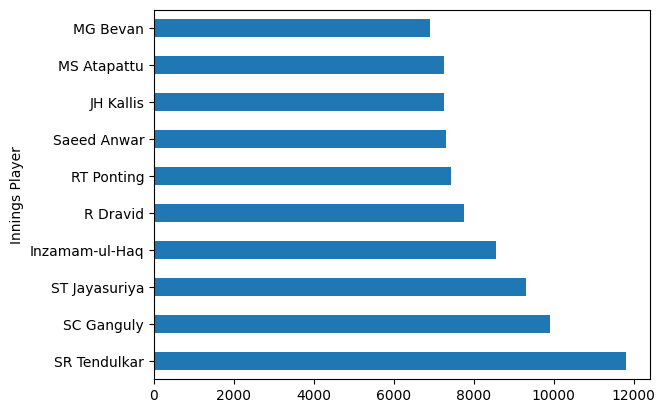

In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

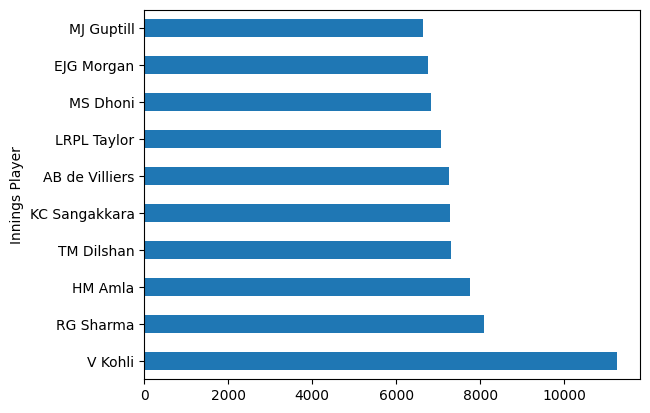

In [ ]:
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

In [ ]:
sdf.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


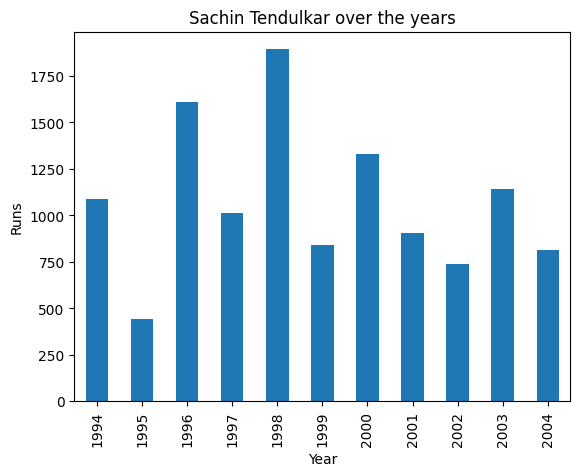

In [ ]:
# Exploring Sachin's progress through run-scoring timeline
sdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = "bar")
plt.title("Sachin Tendulkar over the years")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.show()


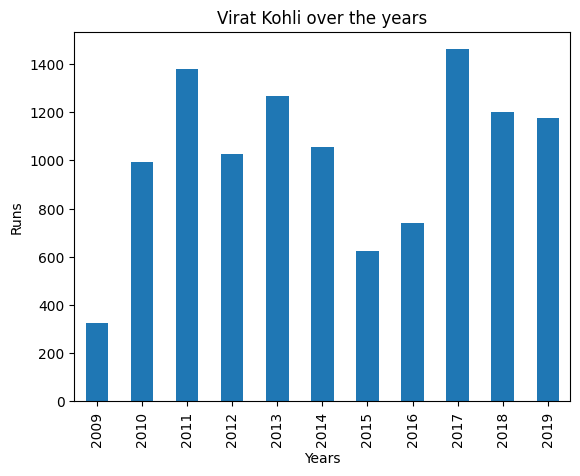

In [ ]:
# Exploring Virat's progress through run-scoring timeline
kdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = "bar")
plt.title("Virat Kohli over the years")
plt.xlabel("Years")
plt.ylabel("Runs")
plt.show()

In [ ]:
### NORMALIZATION

In [ ]:
# sachin_df = player runs with Sachin
# Player Runs excluding Sachin --> not_sachin = sachin_df[sachin_df['Inningsplayer'] ! = "SR Tendulkar"]

In [ ]:
# Parameter 1 - Runs per Innings
sum(virat_df['Innings Runs Scored Num'])/len(virat_df),sum(sachin_df['Innings Runs Scored Num'])/len(sachin_df)

(24.99673202614379, 22.69352006124195)

In [ ]:
non_sachin_df = sachin_df[sachin_df["Innings Player"] != 'SR Tendulkar']

In [ ]:
non_virat_df = virat_df[virat_df["Innings Player"] != 'V Kohli']

In [ ]:
sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df)

22.43512946754194

In [ ]:
sum(non_virat_df['Innings Runs Scored Num'])/len(non_virat_df)

24.737756786500366

In [ ]:
# Sachin scored nearly 1.95 times higher on an avergae than all other batters during this period (1994-2004)
(sum(sdf['Innings Runs Scored Num'])/len(sdf))/(sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df))

1.9437755485945407

In [ ]:
# Kohli scored more than double on average than all the other batters during this period (2009-2019)
(sum(kdf['Innings Runs Scored Num'])/len(kdf))/(sum(non_virat_df['Innings Runs Scored Num'])/len(non_virat_df))

2.029683688052565

In [ ]:
# Sachin v/s others

In [ ]:
# Strike rate
# Sachin - 88.2, Others = 72.3; Normalized value = 88.2/72.3 =1.22
sum(non_sachin_df['Innings Runs Scored Num'])/sum(non_sachin_df['Innings Balls Faced'])*100

72.33808936558636

In [ ]:
# 100s - No. of matches taken to score a 100
# Sachin - 7 innings, Others = 47 innings, Normalized value =7/47 = 0.15
len(sdf["Innings Player"])/sum(sdf["100's"]),len(non_sachin_df["Innings Player"])/sum(non_sachin_df["100's"])

(7.324324324324325, 47.377969762419006)

In [ ]:
# 50s - No. of matches taken to score a 50
# Sachin - 5 innings, Others = 8 innings, Normalized value = 5/8 = 0.63
len(sdf["Innings Player"])/sum(sdf["50's"]),len(non_sachin_df["Innings Player"])/sum(non_sachin_df["50's"])

(4.754385964912281, 8.33751425313569)

In [ ]:
# Team contribution
# Sachin - 16.9%, Others - 83.1%
sum(non_sachin_df[non_sachin_df.Country == "India"]['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == "India"]["Innings Runs Scored Num"])*100

83.04812450692104

In [ ]:
# Virat v/s others

In [ ]:
# KPI no. 1
# Strike rate
# Virat - 93.6, Others = 83.4; Normalized Value = 93.6/83.4 = 1.12
sum(non_virat_df['Innings Runs Scored Num'])/sum(non_virat_df['Innings Balls Faced'])*100

83.42743413330611

In [ ]:
# 100s - No. of matches taken to score a 100
# Virat - 5 innings, Others = 29 innings; Normalized value = 5/29 = 0.17
len(kdf["Innings Player"])/sum(kdf["100's"]),len(non_virat_df["Innings Player"])/sum(non_virat_df["100's"])

(5.333333333333333, 29.311827956989248)

In [ ]:
# 50s - No. of matches taken to score a 50
# Virat - 4 innings, Others = 8 innings; Normalized value = 4/8 = 0.5
len(kdf["Innings Player"])/sum(kdf["50's"]),len(non_virat_df["Innings Player"])/sum(non_virat_df["50's"])

(4.226415094339623, 7.673469387755102)

In [ ]:
# Team contribution
# Virat - 17.6%, Others - 82.4%
sum(non_virat_df[non_virat_df.Country == "India"]['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == "India"]["Innings Runs Scored Num"])*100

82.38996664944337